In [5]:

import pandas as pd

In [6]:
df = pd.read_csv('artikel.csv')
df.head()

,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,Susno Duadji dan Hotman Paris Beda Pendapat so...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,"TRIBUNNEWS.COM, JAKARTA - Pengacara kondang H...",nasional
1,BREAKING NEWS: Jokowi Benarkan Adanya Pemotong...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,Laporan Wartawan Tribunnews Taufik Ismail\nTRI...,nasional
2,6 'Kemewahan' Nayunda dari SYL: Saweran Ratusa...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,TRIBUNNEWS.COM - Penyanyi dangdut Nayunda Nabi...,nasional
3,Peran Ditjen Administrasi Hukum Umum Diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,"TRIBUNNEWS.COM, JAKARTA - Direktorat Jenderal ...",nasional
4,"Senator Bali Dipecat Badan Kehormatan DPD RI, ...","Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,"Laporan Wartawan Tribunnews.com, Chaerul Umam\...",nasional


## Exploratory Data Analysis

In [7]:
# exploratory data analysis
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27754 entries, 0 to 27753
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Judul        27754 non-null  object
 1   Tanggal      27754 non-null  object
 2   Penulis      27754 non-null  object
 3   Editor       27754 non-null  object
 4   Isi Artikel  27753 non-null  object
 5   Kategori     27754 non-null  object
dtypes: object(6)
memory usage: 1.3+ MB
None


Kategori
regional         5000
internasional    4998
pendidikan       4998
metropolitan     4989
nasional         4854
lifestyle        2915
Name: count, dtype: int64


<Axes: xlabel='Kategori'>

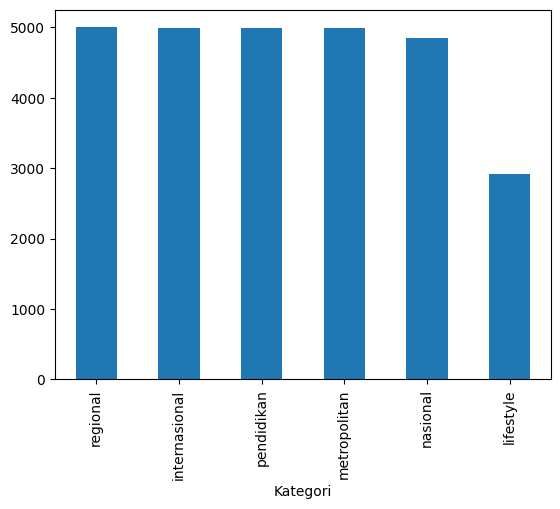

In [8]:
# tampilkan distribusi data katagori
print(df['Kategori'].value_counts())
# visualisasi distribusi data katagori
df['Kategori'].value_counts().plot(kind='bar')

In [9]:
#cek isian data kosong

print(df.isnull().sum())

Judul          0
Tanggal        0
Penulis        0
Editor         0
Isi Artikel    1
Kategori       0
dtype: int64


In [10]:
#hapus baris data yang kosong
df = df.dropna()
print(df.isnull().sum())

Judul          0
Tanggal        0
Penulis        0
Editor         0
Isi Artikel    0
Kategori       0
dtype: int64


Kategori
regional         5000
internasional    4998
pendidikan       4998
metropolitan     4988
nasional         4854
lifestyle        2915
Name: count, dtype: int64


<Axes: xlabel='Kategori'>

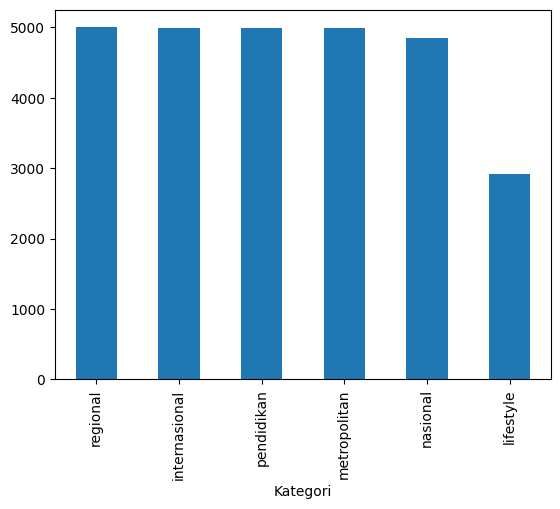

In [11]:
# tampilkan distribusi data katagori
print(df['Kategori'].value_counts())
# visualisasi distribusi data katagori
df['Kategori'].value_counts().plot(kind='bar')

## Prepocessing Data

In [12]:
import re

# Fungsi untuk membersihkan teks
def clean_text(text):
    # Menghapus URL
    text = re.sub(r'http\S+', '', text)
    # Menghapus karakter non-alfabet dan mengubahnya menjadi huruf kecil
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = text.lower()
    # Menghapus spasi berlebih
    text = ' '.join(text.split())
    # # Menghapus angka
    # text = re.sub(r'\d+', '', text)
    # menghapus tag html
    text = re.sub(r'<.*?>', '', text)
    # menghapus karakter tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # menghapus -, +, *, /, =, dll
    text = re.sub(r'[-+*/=]', '', text)
    return text

# # Menerapkan fungsi pembersihan ke kolom "Isi Artikel" dan "Judul"
# df['juduldf['Isi Artikel'].apply(clean_text)
# df['Judul'].apply(clean_text)

# # Fill NaN values with an empty string
# df['Judul'] = df['Judul'].fillna('')
# df['Isi Artikel'] = df['Isi Artikel'].fillna('')

df['Judul'] = df['Judul'].apply(clean_text)
df['Isi Artikel'] = df['Isi Artikel'].apply(clean_text)

In [13]:
df.head()


,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,susno duadji dan hotman paris beda pendapat so...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,tribunnewscom jakarta pengacara kondang hotman...,nasional
1,breaking news jokowi benarkan adanya pemotonga...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,laporan wartawan tribunnews taufik ismail trib...,nasional
2,6 kemewahan nayunda dari syl saweran ratusan j...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,tribunnewscom penyanyi dangdut nayunda nabila ...,nasional
3,peran ditjen administrasi hukum umum diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,tribunnewscom jakarta direktorat jenderal admi...,nasional
4,senator bali dipecat badan kehormatan dpd ri l...,"Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,laporan wartawan tribunnewscom chaerul umam tr...,nasional


In [14]:
%pip install Sastrawi

Note: you may need to restart the kernel to use updated packages.


In [15]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
#menghapus kata tribunnews
def remove_tribunnews(text):
    text = text.replace('tribunnewscom', '')
    return text

# Menerapkan fungsi remove_tribunnews ke kolom "Isi Artikel" dan "Judul"
df['Judul'] = df['Judul'].apply(remove_tribunnews)
df['Isi Artikel'] = df['Isi Artikel'].apply(remove_tribunnews)

In [17]:
df.head()

,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,susno duadji dan hotman paris beda pendapat so...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,jakarta pengacara kondang hotman paris beda p...,nasional
1,breaking news jokowi benarkan adanya pemotonga...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,laporan wartawan tribunnews taufik ismail jak...,nasional
2,6 kemewahan nayunda dari syl saweran ratusan j...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,penyanyi dangdut nayunda nabila nizrinah ikut...,nasional
3,peran ditjen administrasi hukum umum diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,jakarta direktorat jenderal administrasi huku...,nasional
4,senator bali dipecat badan kehormatan dpd ri l...,"Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,laporan wartawan chaerul umam jakarta ketua ...,nasional


In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muksalbakrie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

# Membuat fungsi stopword removal 
def stopwordd(text):
    text = stopword.remove(text)
    return text

# Menerapkan fungsi stopword removal ke kolom "Isi Artikel" dan "Judul"
df['Judul'] = df['Judul'].apply(stopwordd)
df['Isi Artikel'] = df['Isi Artikel'].apply(stopwordd)

In [20]:
df.head()

,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,susno duadji hotman paris beda pendapat soal p...,"Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,jakarta pengacara kondang hotman paris beda p...,nasional
1,breaking news jokowi benarkan adanya pemotonga...,"Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,laporan wartawan tribunnews taufik ismail jak...,nasional
2,6 kemewahan nayunda syl saweran ratusan juta t...,"Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,penyanyi dangdut nayunda nabila nizrinah ikut...,nasional
3,peran ditjen administrasi hukum umum diganjar ...,"Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,jakarta direktorat jenderal administrasi huku...,nasional
4,senator bali dipecat badan kehormatan dpd ri l...,"Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,laporan wartawan chaerul umam jakarta ketua ...,nasional


In [21]:
#tokenisasi menggunakan nltk

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Membuat fungsi tokenisasi
def tokenisasi(text):
    return word_tokenize(text)

# Menerapkan fungsi tokenisasi ke kolom "Isi Artikel" dan "Judul"
df['Judul'] = df['Judul'].apply(tokenisasi)
df['Isi Artikel'] = df['Isi Artikel'].apply(tokenisasi)

df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/muksalbakrie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Judul,Tanggal,Penulis,Editor,Isi Artikel,Kategori
0,"[susno, duadji, hotman, paris, beda, pendapat,...","Selasa, 30 Juli 2024 21:25 WIB",Hasanudin Aco,Editor tidak ditemukan,"[jakarta, pengacara, kondang, hotman, paris, b...",nasional
1,"[breaking, news, jokowi, benarkan, adanya, pem...","Senin, 27 Mei 2024 22:42 WIB",Taufik Ismail,Acos Abdul Qodir,"[laporan, wartawan, tribunnews, taufik, ismail...",nasional
2,"[6, kemewahan, nayunda, syl, saweran, ratusan,...","Rabu, 29 Mei 2024 21:31 WIB",Faryyanida Putwiliani,Garudea Prabawati,"[penyanyi, dangdut, nayunda, nabila, nizrinah,...",nasional
3,"[peran, ditjen, administrasi, hukum, umum, dig...","Rabu, 21 Agustus 2024 20:45 WIB",Ilham Rian Pratama,Wahyu Aji,"[jakarta, direktorat, jenderal, administrasi, ...",nasional
4,"[senator, bali, dipecat, badan, kehormatan, dp...","Jumat, 2 Februari 2024 18:09 WIB",Chaerul Umam,Dodi Esvandi,"[laporan, wartawan, chaerul, umam, jakarta, ke...",nasional


In [22]:
#vectorization

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Judul' and 'Isi Artikel' columns
tfidf_isi_artikel = tfidf_vectorizer.fit_transform(df['Isi Artikel'].apply(lambda x: ' '.join(x)))

# Convert the result to a DataFrame for better readability
tfidf_isi_artikel_df = pd.DataFrame(tfidf_isi_artikel.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_isi_artikel_df.head())

    00  000  0000  000000  000000000783d  000000002  0000000090387  \
0  0.0  0.0   0.0     0.0            0.0        0.0            0.0   
1  0.0  0.0   0.0     0.0            0.0        0.0            0.0   
2  0.0  0.0   0.0     0.0            0.0        0.0            0.0   
3  0.0  0.0   0.0     0.0            0.0        0.0            0.0   
4  0.0  0.0   0.0     0.0            0.0        0.0            0.0   

   0000000392e  00000100  00001  ...  zyumbi  zyunbi   zz  zza  zzambia  zzd  \
0          0.0       0.0    0.0  ...     0.0     0.0  0.0  0.0      0.0  0.0   
1          0.0       0.0    0.0  ...     0.0     0.0  0.0  0.0      0.0  0.0   
2          0.0       0.0    0.0  ...     0.0     0.0  0.0  0.0      0.0  0.0   
3          0.0       0.0    0.0  ...     0.0     0.0  0.0  0.0      0.0  0.0   
4          0.0       0.0    0.0  ...     0.0     0.0  0.0  0.0      0.0  0.0   

   zzh  zzp  zzt  zzu  
0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  
3 

## Label Encoder

In [55]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Kategori' column
df['Kategori_encoded'] = label_encoder.fit_transform(df['Kategori'])

# Display the first few rows to verify the encoding
print(df[['Kategori', 'Kategori_encoded']].head())
df.head()

#display encode for each category
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

   Kategori  Kategori_encoded
0  nasional                 3
1  nasional                 3
2  nasional                 3
3  nasional                 3
4  nasional                 3
{'internasional': 0, 'lifestyle': 1, 'metropolitan': 2, 'nasional': 3, 'pendidikan': 4, 'regional': 5}


## Menyimpan teks bersih ke csv

In [69]:
df.head()

df.to_csv('cleaned_artikel.csv', index=False)

## Membangun Model Klasifikasi Teks

In [24]:
from sklearn.model_selection import train_test_split

# Combine title and article content as features
X = df[['Judul', 'Isi Artikel']].apply(lambda x: ' '.join(x['Judul']) + ' ' + ' '.join(x['Isi Artikel']), axis=1)

# Set target variable
y = df['Kategori_encoded']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (22202,)
Test set shape: (5551,)


In [25]:
# Fit and transform the training data
tfidf_X_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
tfidf_X_test = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF training set shape: {tfidf_X_train.shape}")
print(f"TF-IDF test set shape: {tfidf_X_test.shape}")

TF-IDF training set shape: (22202, 170210)
TF-IDF test set shape: (5551, 170210)


### Multinomial Model 

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

#grid search

# Membuat objek MultinomialNB
model = MultinomialNB()

# Membuat grid parameter
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Melakukan training model
grid_search.fit(tfidf_X_train, y_train)

# Menampilkan parameter terbaik
print(grid_search.best_params_)

# Menampilkan skor validasi terbaik
print(grid_search.best_score_)
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.1)

# Train the classifier
nb_classifier.fit(tfidf_X_train, y_train)

# Predict the categories of the test set
y_pred = nb_classifier.predict(tfidf_X_test)


# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")



# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(class_report)

{'alpha': 0.1}
0.8763169463090652
Model accuracy: 0.8857863448027382
               precision    recall  f1-score   support

internasional       0.98      0.94      0.96      1000
    lifestyle       0.97      0.90      0.94       583
 metropolitan       0.85      0.85      0.85       997
     nasional       0.73      0.82      0.77       971
   pendidikan       0.94      0.97      0.96      1000
     regional       0.89      0.83      0.86      1000

     accuracy                           0.89      5551
    macro avg       0.89      0.89      0.89      5551
 weighted avg       0.89      0.89      0.89      5551



### Logistic Regresion Model

Model accuracy: 0.9110070257611241
               precision    recall  f1-score   support

internasional       0.98      0.95      0.97      1000
    lifestyle       0.94      0.95      0.94       583
 metropolitan       0.88      0.89      0.89       997
     nasional       0.82      0.82      0.82       971
   pendidikan       0.98      0.96      0.97      1000
     regional       0.87      0.91      0.89      1000

     accuracy                           0.91      5551
    macro avg       0.91      0.91      0.91      5551
 weighted avg       0.91      0.91      0.91      5551



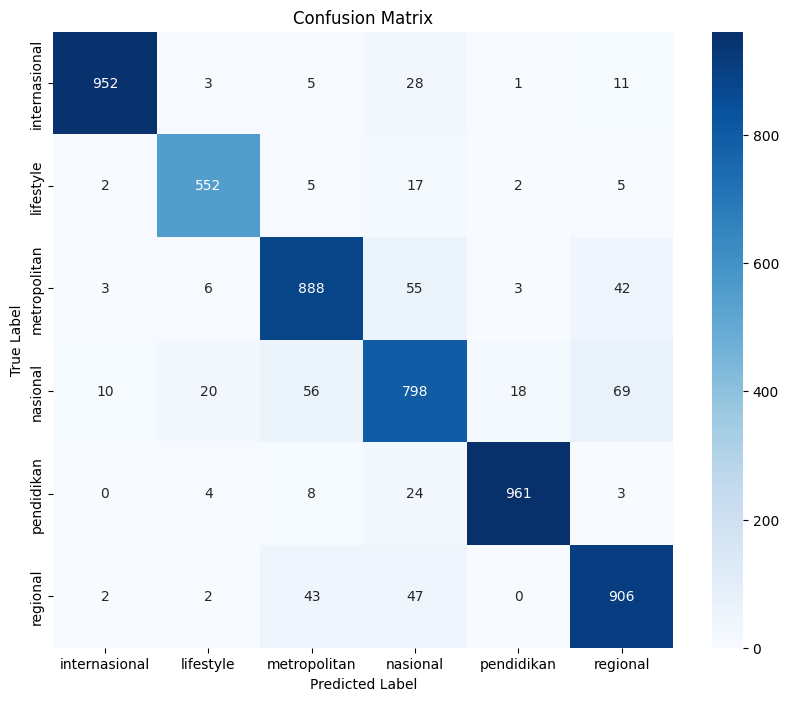

In [ ]:
# logistic regression

from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Train the classifier
logreg_classifier.fit(tfidf_X_train, y_train)

# Predict the categories of the test set
y_pred = logreg_classifier.predict(tfidf_X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(class_report)

# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

### Logistic regression grid search

In [60]:
# logistic regression grid search

# Membuat objek LogisticRegression
model = LogisticRegression(max_iter=1000)

# Membuat grid parameter
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5)

# Melakukan training model
grid_search.fit(tfidf_X_train, y_train)

# Menampilkan parameter terbaik
print(grid_search.best_params_)

# Menampilkan skor validasi terbaik
print(grid_search.best_score_)




{'C': 5.0}
0.9086113224235268


In [64]:
# Initialize the Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000, C=5.0)

# Train the classifier
logreg_classifier.fit(tfidf_X_train, y_train)

# Predict the categories of the test set
y_pred = logreg_classifier.predict(tfidf_X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(class_report)



Model accuracy: 0.914249684741488
               precision    recall  f1-score   support

internasional       0.98      0.96      0.97      1000
    lifestyle       0.94      0.96      0.95       583
 metropolitan       0.89      0.90      0.90       997
     nasional       0.84      0.81      0.83       971
   pendidikan       0.97      0.96      0.97      1000
     regional       0.87      0.91      0.89      1000

     accuracy                           0.91      5551
    macro avg       0.92      0.92      0.92      5551
 weighted avg       0.91      0.91      0.91      5551



In [46]:
#predict
def predict_category(title, content):
    # Combine title and content
    text = title + ' ' + content
    
    # Vectorize the text
    text_vectorized = tfidf_vectorizer.transform([text])
    
    # Predict the category
    category = nb_classifier.predict(text_vectorized)
    
    # Decode the category
    category = label_encoder.inverse_transform(category)
    
    return category[0]


# Test the function
title = ""
content = "belajar"
print(predict_category(title, content))

pendidikan


In [ ]:
#predict regression
def predict_category(title, content):
    # Combine title and content
    text = title + ' ' + content
    
    # Predict the category
    category = pipe.predict([text])
    
    # Decode the category
    category = label_encoder.inverse_transform(category)
    
    return category[0]

#test the function
title = ""
content = ""
print(predict_category(title, content))

metropolitan


### SVM Model

Model accuracy: 0.9110070257611241
               precision    recall  f1-score   support

internasional       0.98      0.95      0.97      1000
    lifestyle       0.95      0.94      0.94       583
 metropolitan       0.89      0.89      0.89       997
     nasional       0.81      0.82      0.82       971
   pendidikan       0.98      0.96      0.97      1000
     regional       0.88      0.91      0.89      1000

     accuracy                           0.91      5551
    macro avg       0.91      0.91      0.91      5551
 weighted avg       0.91      0.91      0.91      5551



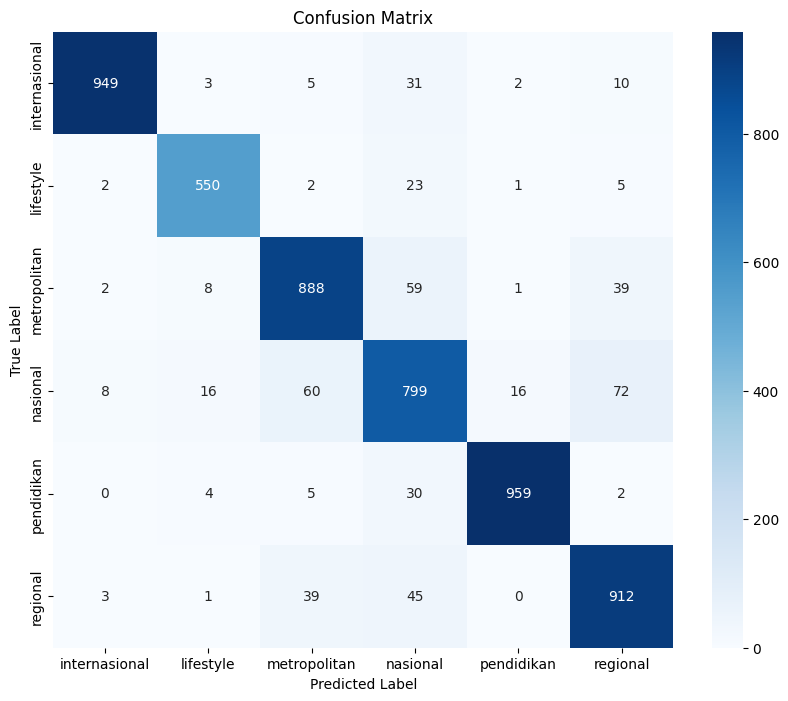

In [66]:
#svm model
from sklearn.svm import SVC

# Initialize the Support Vector Machine classifier
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(tfidf_X_train, y_train)

# Predict the categories of the test set
y_pred = svm_classifier.predict(tfidf_X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

# Generate the classification report
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)
print(class_report)

# confusion matrix
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


### Menyimpan Model

In [67]:
import joblib

# Save the Logistic Regression model
joblib.dump(logreg_classifier, 'model/logreg_model.pkl')

# Save the Naive Bayes model
joblib.dump(nb_classifier, 'model/nb_model.pkl')

# Save the SVM model
joblib.dump(svm_classifier, 'model/svm_model.pkl')

['model/svm_model.pkl']

In [ ]:
import joblib

# Load the models
logreg_model = joblib.load('model/logreg_model.pkl')
nb_model = joblib.load('model/nb_model.pkl')
svm_model = joblib.load('model/svm_model.pkl')

# Load the TF-IDF vectorizer
tfidf_vectorizer = joblib.load('model/tfidf_vectorizer.pkl')

# Function to preprocess the text
def preprocess_text(text):
    text = clean_text(text)
    text = stopwordd(text)
    text = ' '.join(tokenisasi(text))
    return text

# Function to predict category using all three models
def predict_category_all_models(title, content):
    # Combine title and content
    text = title + ' ' + content
    
    # Preprocess the text
    text = preprocess_text(text)
    
    # Vectorize the text
    text_vectorized = tfidf_vectorizer.transform([text])
    
    # Predict the category using Logistic Regression
    logreg_pred = logreg_model.predict(text_vectorized)
    logreg_category = label_encoder.inverse_transform(logreg_pred)[0]
    
    # Predict the category using Naive Bayes
    nb_pred = nb_model.predict(text_vectorized)
    nb_category = label_encoder.inverse_transform(nb_pred)[0]
    
    # Predict the category using SVM
    svm_pred = svm_model.predict(text_vectorized)
    svm_category = label_encoder.inverse_transform(svm_pred)[0]
    
    return logreg_category, nb_category, svm_category

# Load new data from text file
with open('new_data.txt', 'r') as file:
    lines = file.readlines()

# Assuming each line in the text file is a new data point with title and content separated by a tab
for line in lines:
    title, content = line.strip().split('\t')
    logreg_category, nb_category, svm_category = predict_category_all_models(title, content)
    print(f"Title: {title}")
    print(f"Content: {content}")
    print(f"Logistic Regression Prediction: {logreg_category}")
    print(f"Naive Bayes Prediction: {nb_category}")
    print(f"SVM Prediction: {svm_category}")
    print("\n")